## Importação das Bibliotecas

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

## Leitura dos Dados e Divisão

In [9]:
dataset = pd.read_csv('bank-full.csv', delimiter=';')
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
dataset.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
X = dataset.iloc[:, [0, 1, 3, 4, 5, 6, 7, 12, 13, 14, 15]].values 
y = dataset.iloc[:, -1].values 

In [13]:
np.unique(y, return_counts=True)

(array(['no', 'yes'], dtype=object), array([39922,  5289], dtype=int64))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y) # Stratify garante a divisão correta para dados desbalanceados

In [15]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,35,management,tertiary,no,1350,yes,no,1,330,1,failure
1,59,admin.,secondary,no,145,yes,no,2,287,13,success
2,53,management,tertiary,no,1786,yes,no,2,-1,0,unknown
3,37,management,tertiary,no,1170,no,yes,3,-1,0,unknown
4,46,entrepreneur,primary,no,829,no,yes,7,-1,0,unknown


## Transformação dos Dados

In [17]:
lb = LabelEncoder()
for col in [3, 5, 6]:
    X_train[:, col] = lb.fit_transform(X_train[:, col])
    X_test[:, col] = lb.transform(X_test[:, col])

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [18]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 10])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [19]:
pd.DataFrame(X_train).nunique()

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20      77
21       2
22    6585
23       2
24       2
25      45
26     525
27      40
dtype: int64

In [20]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35,0,1350,1,0,1,330,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,59,0,145,1,0,2,287,13
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,53,0,1786,1,0,2,-1,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,37,0,1170,0,1,3,-1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,46,0,829,0,1,7,-1,0


In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train[:, [20, 22, 25, 26, 27]] = scaler.fit_transform(X_train[:,  [20, 22, 25, 26, 27]])
X_test[:,  [20, 22, 25, 26, 27]] = scaler.transform(X_test[:,  [20, 22, 25, 26, 27]])

In [22]:
st = SMOTE(sampling_strategy='minority', random_state=0)
X_train, y_train = st.fit_resample(X_train, y_train)

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([31937, 31937], dtype=int64))

In [24]:
X_test = np.array(X_test, dtype=float)
X_train = np.array(X_train, dtype=float)

In [25]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.37958716,
        0.00363636],
       [1.        , 0.        , 0.        , ..., 0.01612903, 0.33027523,
        0.04727273],
       [0.        , 0.        , 0.        , ..., 0.01612903, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.61809047,
        0.01207033],
       [0.        , 0.        , 1.        , ..., 0.04635573, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01707974, 0.22949417,
        0.00748707]])

In [26]:
X_test

array([[0.        , 1.        , 0.        , ..., 0.01612903, 0.36238532,
        0.04      ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.06451613, 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.03225806, 0.52522936,
        0.00363636],
       [0.        , 1.        , 0.        , ..., 0.01612903, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06451613, 0.        ,
        0.        ]])

## Redes Neurais

In [28]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=212, activation='relu'), # se x > 0 retorna x se não retorna 0
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Faz cálculo tras valores entre 0 a 1 
])

In [29]:
ann.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
r = ann.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 3s 894us/step - accuracy: 0.6469 - loss: 0.6213 - val_accuracy: 0.7896 - val_loss: 0.5389
Epoch 2/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.6733 - loss: 0.5965 - val_accuracy: 0.7556 - val_loss: 0.5814
Epoch 3/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.6753 - loss: 0.5921 - val_accuracy: 0.7402 - val_loss: 0.5788
Epoch 4/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.6777 - loss: 0.5919 - val_accuracy: 0.7599 - val_loss: 0.5722
Epoch 5/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.6780 - loss: 0.5893 - val_accuracy: 0.7499 - val_loss: 0.5751
Epoch 6/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.6793 - loss: 0.5874 - val_accuracy: 0.7582 - val_loss: 0.5732
Epoch 7/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.6821 - loss: 0.5845 - val_accuracy: 0.7339 - val_loss: 0.5843
Epoch 8/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - accuracy: 0.6761 -

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred >= 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


## Resultados

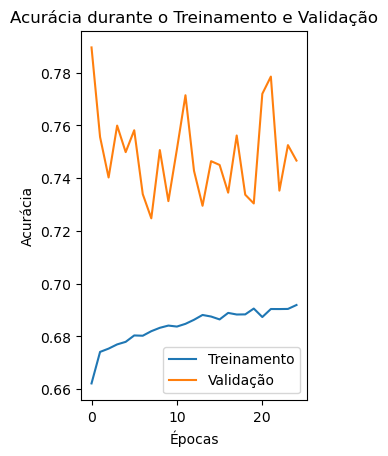

In [33]:
plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='Treinamento')
plt.plot(r.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

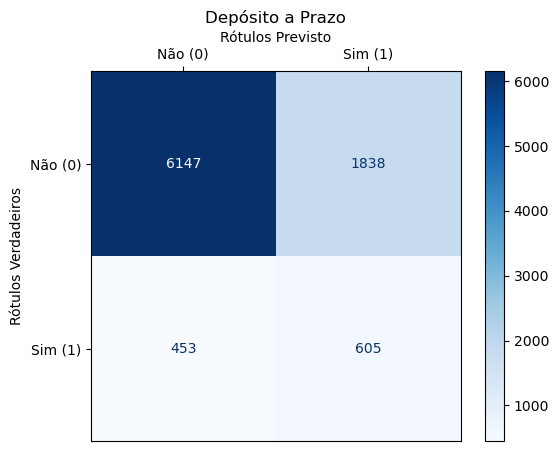

Acurácia: 74.67%


In [34]:
labels = ['Não (0)', 'Sim (1)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

fig, ax = plt.subplots()

disp.plot(cmap=plt.cm.Blues, ax=ax)

ax.xaxis.set_ticks_position('top')  
ax.xaxis.set_label_position('top')  

plt.xticks(rotation=0)  


plt.title("Depósito a Prazo")  
plt.xlabel("Rótulos Previsto")  
plt.ylabel("Rótulos Verdadeiros")  

plt.show()

print(f"Acurácia: {ac:.2%}")

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      7985
           1       0.25      0.57      0.35      1058

    accuracy                           0.75      9043
   macro avg       0.59      0.67      0.59      9043
weighted avg       0.85      0.75      0.78      9043

